In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_ads_mapdata = pd.read_pickle('df_ads_mapdata.pkl')

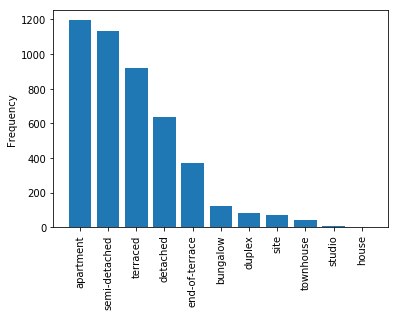

In [2]:
fig, ax = plt.subplots()
df = df_ads_mapdata.property_type.value_counts()
ax.bar(df.index,df)
ax.set_xticklabels(df.index, rotation=90)
ax.set_ylabel("Frequency")
plt.show()

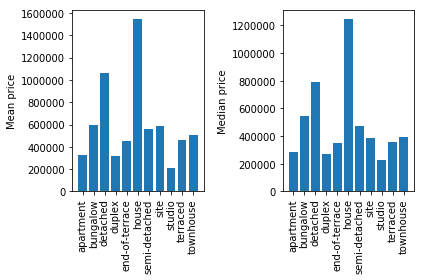

In [3]:
fig, ax = plt.subplots(1,2)

df =  df_ads_mapdata.groupby("property_type")["price"].agg('mean')

ax[0].bar(df.index,df)
ax[0].set_xticklabels(df.index, rotation=90)
ax[0].set_ylabel("Mean price")

df =  df_ads_mapdata.groupby("property_type")["price"].agg('median')

ax[1].bar(df.index,df)
ax[1].set_xticklabels(df.index, rotation=90)
ax[1].set_ylabel("Median price")

plt.tight_layout()
plt.show()